# Objektif
1. Profit (profit setiap tahun, persentase kenaikan profit per tahunnya, dan wilayah dari customer maupun seller yang menghasilkan profit tertinggi)
2. Product (produk yang paling banyak terjual dan produk yang paling banyak menyumbang profit secara keseluruhan serta 5 produk tertinggi dan 5 produk terendah pada setiap tahunnya)
3. Cancel (produk yang paling banyak di cancel serta lokasi dari seller produk tersebut)
4. Best time of purchase (waktu terbaik penjualan akan dianalisa dari sisi jam, hari, tanggal, dan bulan)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [2]:
#Import module
import pandas as pd 
import sqlite3 as sql 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime 

con = sql.connect("/content/drive/MyDrive/olist.db")
cur = con.cursor()
table_list = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()
table_list

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

In [3]:
#show table order
df_order = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
df_order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#show table price
df_price = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
df_price.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#show table product
df_product = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
df_product.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
#show table product
df_product1 = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)
df_product1.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [7]:
#show table seller 
df_seller = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', con)
df_seller.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
#show table customer
df_customer = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
df_customer.set_index("index", inplace=True)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
index,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Data Cleaning

In [9]:
#Choose columnn to analysis
df_product = df_product[['product_id','product_category_name']]
df_product1.drop(['index'], axis = 1, inplace = True)
df_seller = df_seller[['seller_id','seller_city', 'seller_state']]
df_customer = df_customer[['customer_id', 'customer_city', 'customer_state']]
df_order = df_order[['order_id','customer_id', 'order_status', 'order_purchase_timestamp']]
df_price = df_price[['order_id', 'product_id', 'seller_id', 'price']]

In [10]:
#add products not yet in category
df_product1.loc[len(df_product1.index)] = ['pc_gamer','pc_gamer'] 
df_product1.loc[len(df_product1.index)] = ['portateis_cozinha_e_preparadores_de_alimentos','portable kitchen food preparation']
df_product1.tail()

,product_category_name,product_category_name_english
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer
72,portateis_cozinha_e_preparadores_de_alimentos,portable kitchen food preparation


In [11]:
data_product = pd.merge(df_product , df_product1, how='left', on = 'product_category_name')
data_product.drop(['product_category_name'], axis = 1, inplace = True)
data_product.rename(columns={'product_category_name_english': 'product_name'},inplace=True)
data_product.head()

,product_id,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [12]:
#check missing value
data_product.isnull().sum()

product_id        0
product_name    610
dtype: int64

In [13]:
#check persentase null
data_product.isnull().sum()/len(data_product)*100

product_id      0.000000
product_name    1.851234
dtype: float64

In [14]:
#handle missing value
data_product['product_name'] = data_product['product_name'].fillna('unknown')

data_product.isnull().sum()

product_id      0
product_name    0
dtype: int64

In [15]:
df_order.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [16]:
df_order.dtypes

order_id                    object
customer_id                 object
order_status                object
order_purchase_timestamp    object
dtype: object

In [17]:
#change type order_purchase_timestamp
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'], yearfirst = True)
df_order.dtypes

order_id                            object
customer_id                         object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [18]:
df_price.isnull().sum()

order_id      0
product_id    0
seller_id     0
price         0
dtype: int64

In [19]:
#handle duplicate
data_product.duplicated().any()

False

In [20]:
df_order.duplicated().any()

False

In [21]:
df_price.duplicated().any()

True

In [22]:
df_price[df_price.duplicated(keep=False)]

,order_id,product_id,seller_id,price
13,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90
32,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33
...,...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00
112640,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00
112641,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00
112642,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00


In [23]:
df_price = df_price.drop_duplicates()

In [24]:
df_price[df_price.duplicated()]

,order_id,product_id,seller_id,price


In [25]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    102425 non-null  object 
 1   product_id  102425 non-null  object 
 2   seller_id   102425 non-null  object 
 3   price       102425 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


In [26]:
df_customer.duplicated().any()

False

In [27]:
df_seller.duplicated().any()

False

In [28]:
#check inconsistent format
data_product['product_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

In [29]:
#handle inconsistent
perubahan = {"home_confort": "home_comfort", "home_comfort_2": "home_comfort", "home_appliances_2":"home_appliances"}
data_product = data_product.replace(perubahan)

data_product['product_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical', 'part

#EDA

In [30]:
#join data
most_product = pd.merge(data_product , df_price, how='left', on = 'product_id')
most_product = pd.merge(most_product , df_order, how='left', on = 'order_id')
data_analisa = pd.merge(most_product , df_seller, how='left', on = 'seller_id')
data_analisa = pd.merge(data_analisa , df_customer, how='left', on = 'customer_id')
data_analisa.head()

,product_id,product_name,order_id,seller_id,price,customer_id,order_status,order_purchase_timestamp,seller_city,seller_state,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,sao paulo,SP,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,b561927807645834b59ef0d16ba55a24,248.00,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,sao paulo,SP,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,7b07b3c7487f0ea825fc6df75abd658b,79.80,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,sao paulo,SP,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,c510bc1718f0f2961eaa42a23330681a,112.30,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,indaiatuba,SP,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,0be8ff43f22e456b4e0371b2245e4d01,37.90,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,sao paulo,SP,sao paulo,SP


In [31]:
data_analisa['day_purchase'] = data_analisa['order_purchase_timestamp'].dt.day
data_analisa['month_purchase'] = data_analisa['order_purchase_timestamp'].dt.month
data_analisa['year_purchase'] = data_analisa['order_purchase_timestamp'].dt.year
data_analisa['hour_purchase'] = data_analisa['order_purchase_timestamp'].dt.hour
data_analisa['day_week_purchase'] = data_analisa['order_purchase_timestamp'].dt.dayofweek
data_analisa['week_year_purchase'] = data_analisa['order_purchase_timestamp'].dt.isocalendar().week

In [32]:
print(min(data_analisa['order_purchase_timestamp']))
print(max(data_analisa['order_purchase_timestamp']))

2016-09-04 21:15:19
2018-09-03 09:06:57


### Profit

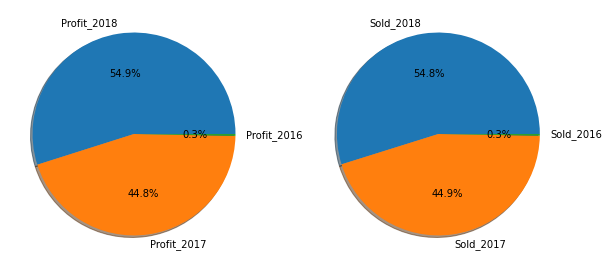

<Figure size 432x288 with 0 Axes>

In [33]:
# pengecekan proporsi profit setiap tahun
condition = data_analisa[(data_analisa['order_status'] == 'delivered')]

# Pembuatan grup data perkatgegori
count_years_price = condition.groupby(["year_purchase"])["price"].count().sort_values(ascending=False).head(5)
sum_years_price = condition.groupby(["year_purchase"])["price"].sum().sort_values(ascending=False).head(5)
count_years_price

# data dan label untuk piechart
data_sum = [5998892.67, 4896112.44, 33478.04]
years_sum = ['Profit_2018', 'Profit_2017', 'Profit_2016']

data_count = [53624, 43899, 272]
years_count = ['Sold_2018', 'Sold_2017', 'Sold_2016']


# Visualization pie chart
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
fig = plt.figure()
axs[0].pie(data_sum, labels=years_sum, autopct='%1.1f%%', shadow=True)
axs[1].pie(data_count, labels=years_count, autopct='%1.1f%%', shadow=True)
plt.show()

In [34]:
# Persentase kenaikan profit tiap tahun
def persentase_kenaikan ():
    
    profit_2016 = 33478.04 # Tahun 2016
    profit_2017 = 4896112.44 # Tahun 2017
    Persentase = ((profit_2017-profit_2016)/profit_2017)*100
    print (Persentase ,"%")
    
    profit_2018 = 5998892.67 # Tahun 2018
    Persentase = ((profit_2018-profit_2017)/profit_2018)*100
    print (Persentase ,"%")

    # Persentase kenaikan penjualan tiap tahun
    sold_2016 = 272 # Tahun 2016
    sold_2017 = 43899 # Tahun 2017
    Persentase = ((sold_2017-sold_2016)/sold_2017)*100
    print (Persentase ,"%")
    
    sold_2018 = 53624 # Tahun 2018
    Persentase = ((sold_2018-sold_2017)/sold_2018)*100
    print (Persentase ,"%")
    
# call definisi
persentase_kenaikan ()  

99.3162322064646 %
18.383063186226327 %
99.38039590879063 %
18.135536327017753 %


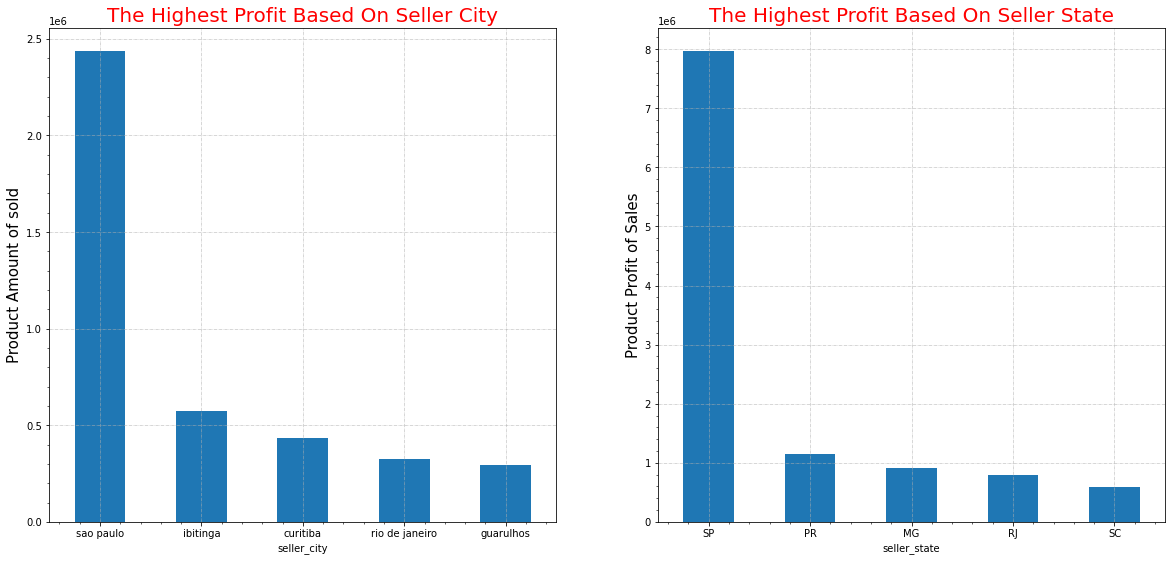

In [35]:
# pengecekan proporsi profit setiap tahun
conditional = data_analisa[(data_analisa['order_status'] == 'delivered')]

# Pembuatan grup data per kategori
city_seller = conditional.groupby(["seller_city"])["price"].sum().sort_values(ascending=False).head(5)
state_seller = conditional.groupby(["seller_state"])["price"].sum().sort_values(ascending=False).head(5)

# Visualization
plt.subplot(2, 2, 1)
city_seller.plot(x="price", y="seller_city", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("The Highest Profit Based On Seller City", size = 20, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
state_seller.plot(x="price", y="seller_state", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("The Highest Profit Based On Seller State", size = 20, c = 'r')
plt.ylabel('Product Profit of Sales', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

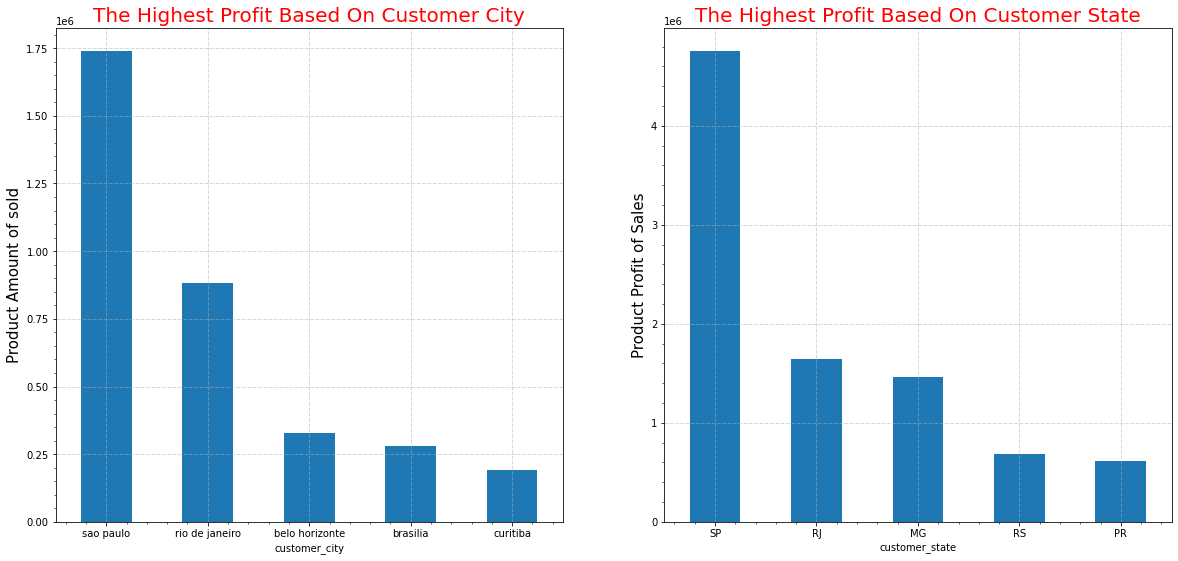

In [36]:
# pengecekan proporsi profit setiap tahun
conditional = data_analisa[(data_analisa['order_status'] == 'delivered')]

# Pembuatan grup data perkatgegori
city_seller = conditional.groupby(["customer_city"])["price"].sum().sort_values(ascending=False).head(5)
state_seller = conditional.groupby(["customer_state"])["price"].sum().sort_values(ascending=False).head(5)

# Visualization
plt.subplot(2, 2, 1)
city_seller.plot(x="price", y="customer_city", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("The Highest Profit Based On Customer City", size = 20, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
state_seller.plot(x="price", y="customer_state", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("The Highest Profit Based On Customer State", size = 20, c = 'r')
plt.ylabel('Product Profit of Sales', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

### Product

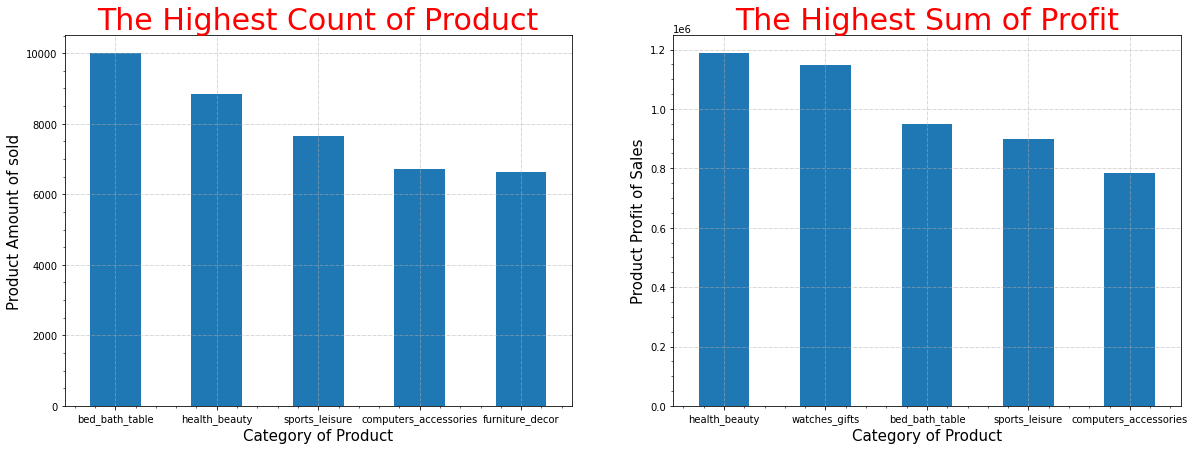

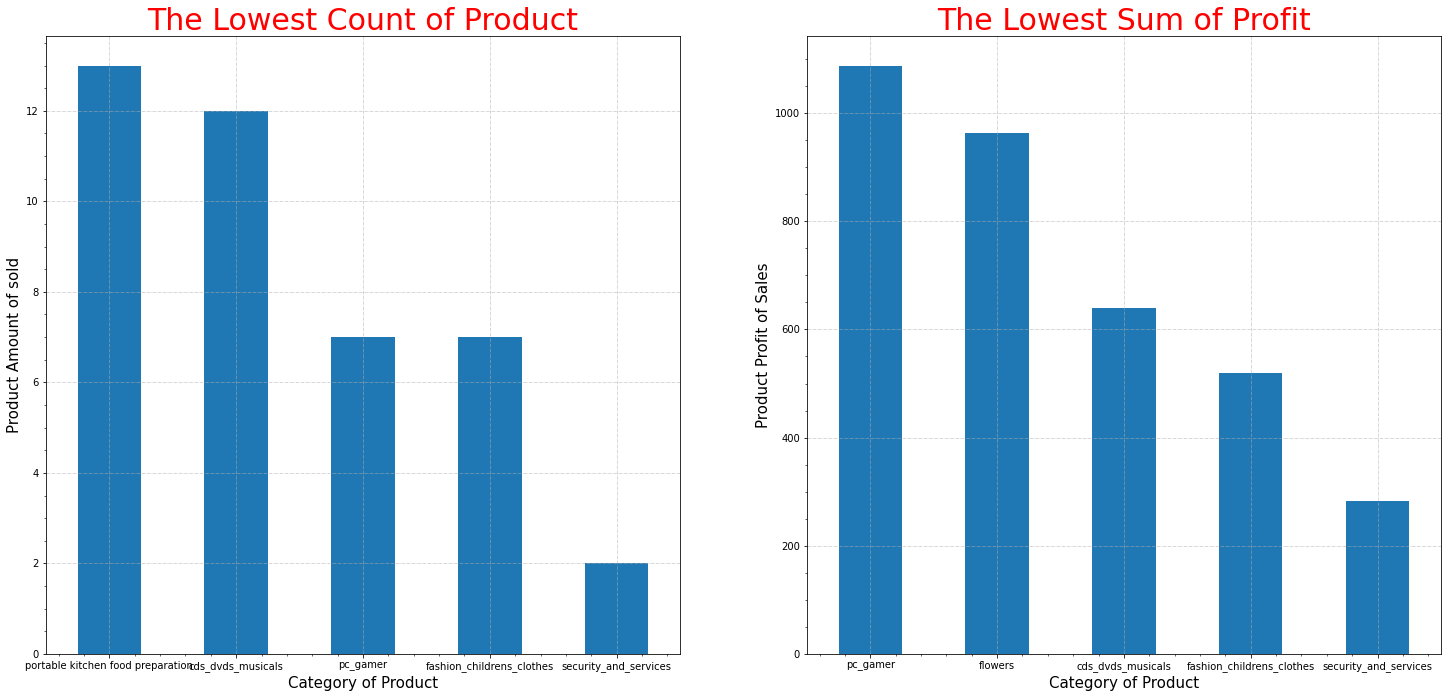

In [37]:
# data barang yang banyak terjual dalam 3 tahun
condition_lowest = data_analisa[(data_analisa['order_status'] == 'delivered')]

count_lowest_price = condition_lowest.groupby(["product_name"])["price"].count().sort_values(ascending=False).tail(5)
sum_lowest_price = condition_lowest.groupby(["product_name"])["price"].sum().sort_values(ascending=False).tail(5)

# data barang yang sedikit terjual dalam 3 tahun
condition_highest = data_analisa[(data_analisa['order_status'] == 'delivered')]

count_hight_price = condition_highest.groupby(["product_name"])["price"].count().sort_values(ascending=False).head(5)
sum_hight_price = condition_highest.groupby(["product_name"])["price"].sum().sort_values(ascending=False).head(5)

# Visualtization barchart From The Highest
plt.subplot(2, 2, 1)
count_hight_price.plot(x="price", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("The Highest Count of Product", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
sum_hight_price.plot(x="price", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("The Highest Sum of Profit", size = 30, c = 'r')
plt.ylabel('Product Profit of Sales', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()


# Visualtization barchart From The Lowest
plt.subplot(2, 2, 3)
count_lowest_price.plot(x="price", y="product", kind="bar", figsize=(25, 25), rot= 0)
plt.title ("The Lowest Count of Product", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 4)
sum_lowest_price.plot(x="price", y="product", kind="bar", figsize=(25, 25), rot= 0)
plt.title ("The Lowest Sum of Profit", size = 30, c = 'r')
plt.ylabel('Product Profit of Sales', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

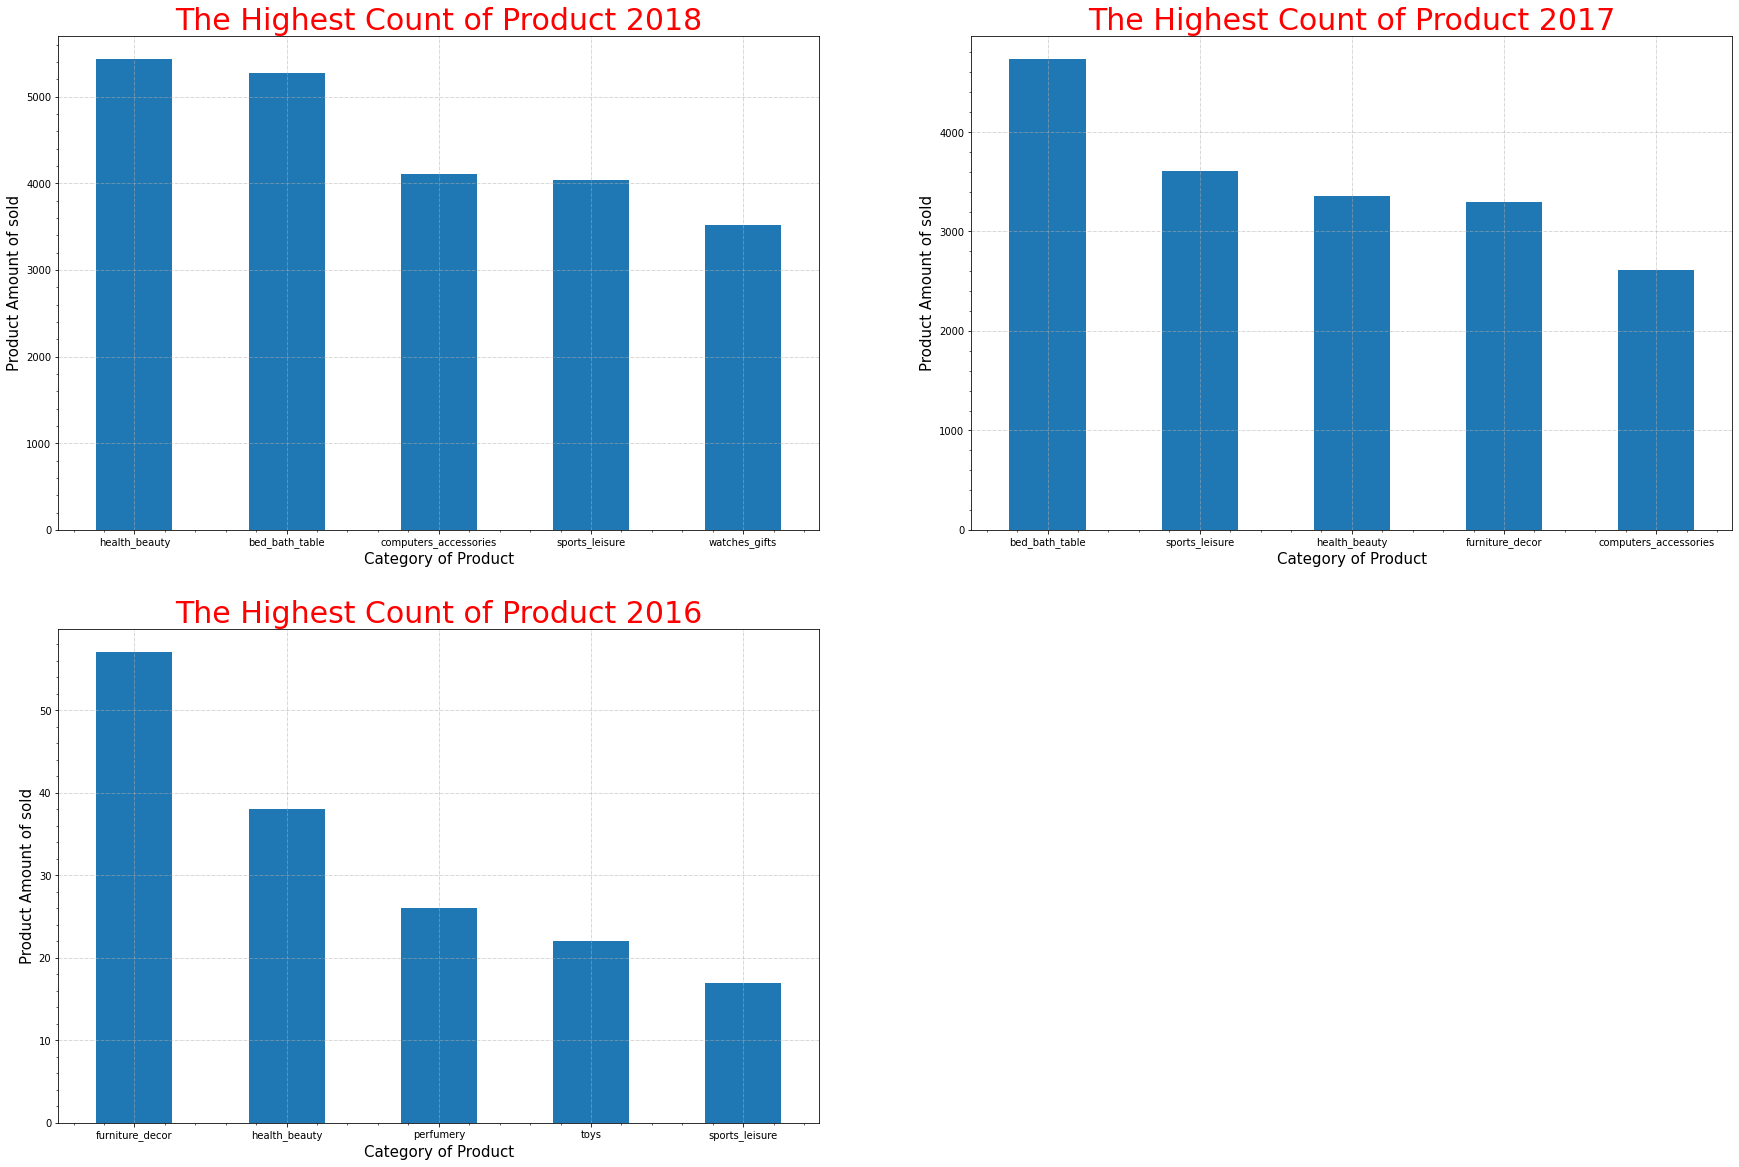

In [38]:
# Trending per tahun (count) the highest
years_2016 = data_analisa[(data_analisa['year_purchase'] == 2016) & (data_analisa['order_status'] == 'delivered')]
bar_2016 = years_2016.groupby(["product_name"])["price"].count().sort_values(ascending=False).head(5)

years_2017 = data_analisa[(data_analisa['year_purchase'] == 2017) & (data_analisa['order_status'] == 'delivered')]
bar_2017 = years_2017.groupby(["product_name"])["price"].count().sort_values(ascending=False).head(5)

years_2018 = data_analisa[(data_analisa['year_purchase'] == 2018) & (data_analisa['order_status'] == 'delivered')]
bar_2018 = years_2018.groupby(["product_name"])["price"].count().sort_values(ascending=False).head(5)

# Visualization
plt.subplot(2, 2, 1)
bar_2018.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest Count of Product 2018", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.subplot(2, 2, 2)
bar_2017.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest Count of Product 2017", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 3 )
bar_2016.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest Count of Product 2016", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')


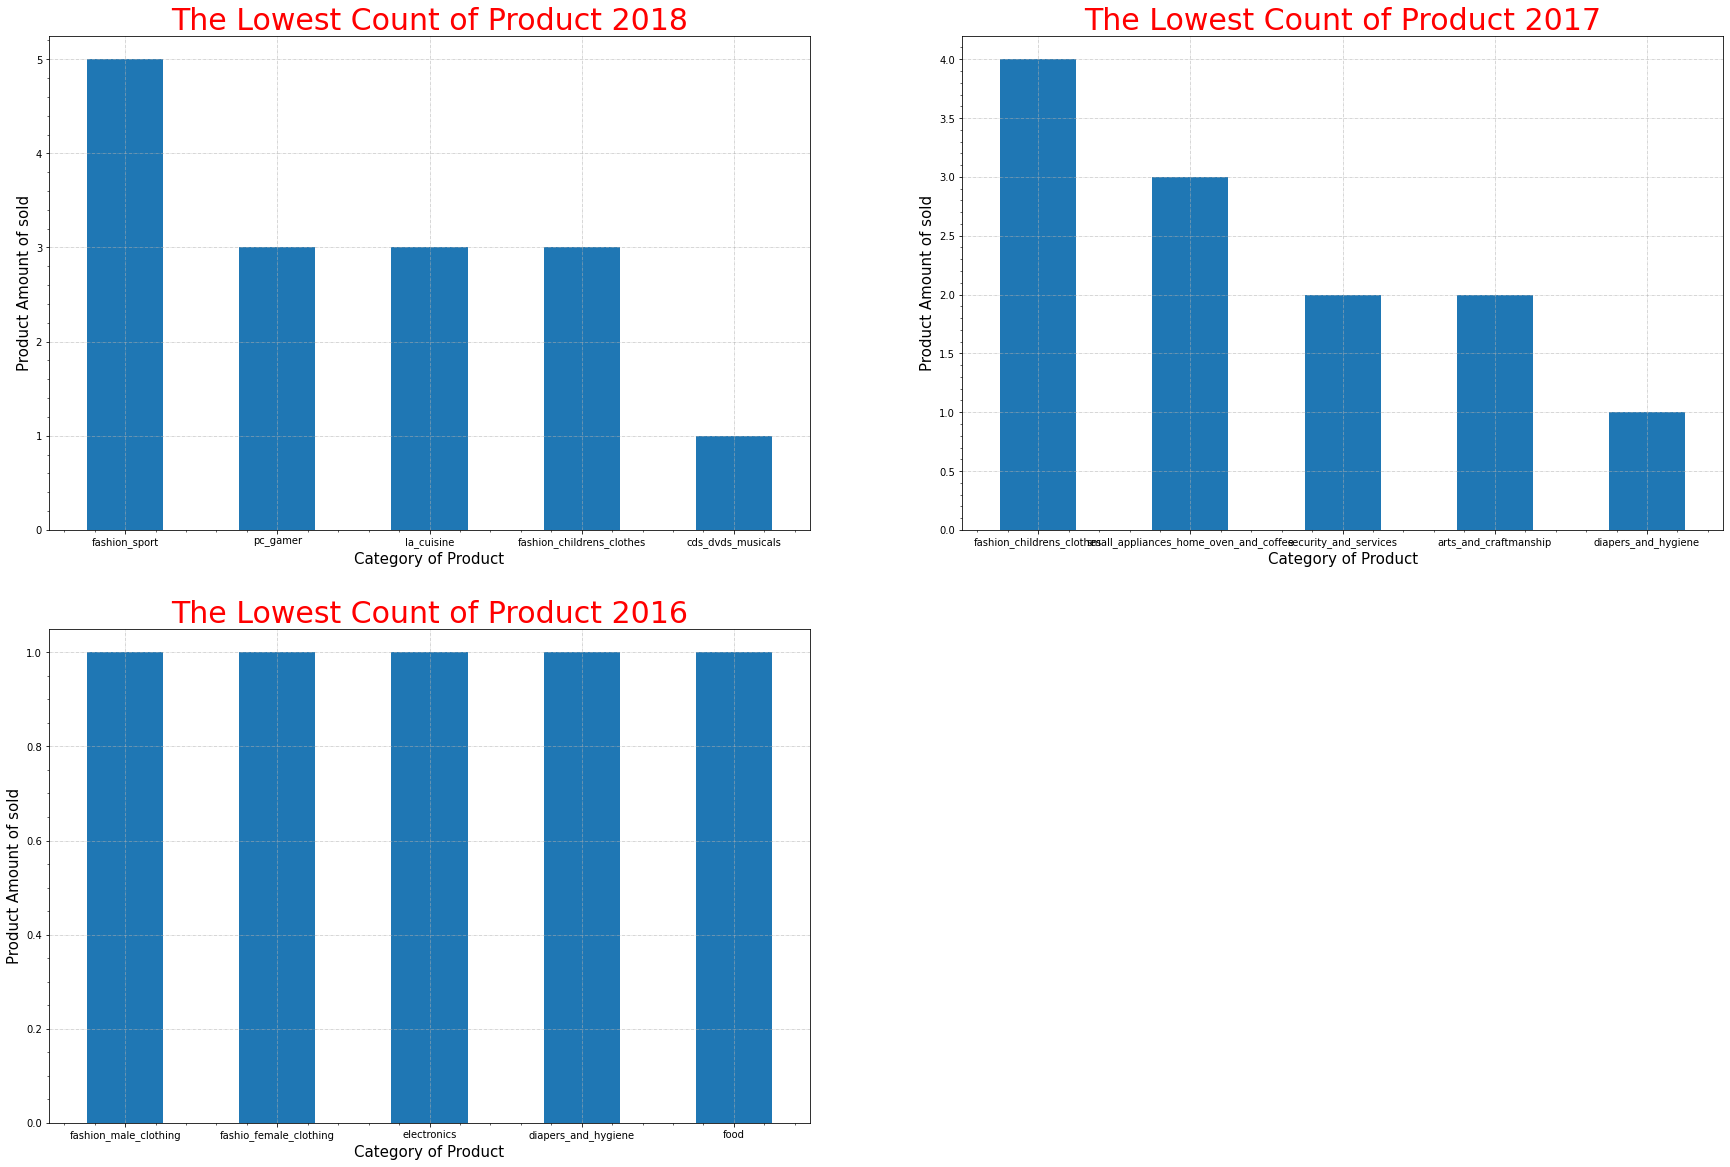

In [39]:
# Trending per tahun (count) the lowest
# membuat kondisi dan groupby
years_2016 = data_analisa[(data_analisa['year_purchase'] == 2016) & (data_analisa['order_status'] == 'delivered') ] 
bar_2016 = years_2016.groupby(["product_name"])["price"].count().sort_values(ascending=False).tail(5)

years_2017 = data_analisa[(data_analisa['year_purchase'] == 2017) & (data_analisa['order_status'] == 'delivered') ] 
bar_2017 = years_2017.groupby(["product_name"])["price"].count().sort_values(ascending=False).tail(5)

years_2018 = data_analisa[(data_analisa['year_purchase'] == 2018) & (data_analisa['order_status'] == 'delivered') ] 
bar_2018 = years_2018.groupby(["product_name"])["price"].count().sort_values(ascending=False).tail(5)

# Visualization
plt.subplot(2, 2, 1)
bar_2018.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Lowest Count of Product 2018", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
bar_2017.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Lowest Count of Product 2017", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 3 )
bar_2016.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Lowest Count of Product 2016", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

### Canceled status

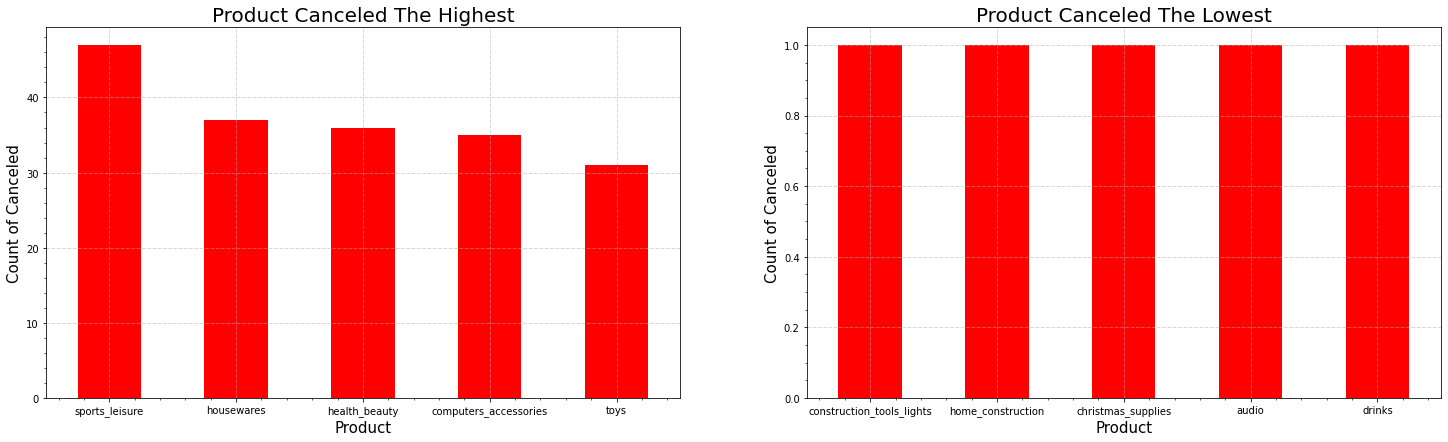

In [40]:
# Pengecekan Comparison Canceled and Delivered
#high condition
condition_cancel_high = data_analisa[data_analisa['order_status'] == 'canceled']
count_cancel_high = condition_cancel_high.groupby(["product_name"])["order_status"].count().sort_values(ascending=False).head()

#low condition
condition_cancel_low = data_analisa[data_analisa['order_status'] == 'canceled']
count_cancel_low = condition_cancel_low.groupby(["product_name"])["order_status"].count().sort_values(ascending=False).tail()

# Visualization The Highest
plt.subplot(2, 2, 1 )
count_cancel_high.plot(x="order_status", y="product", kind="bar", figsize=(25, 15), rot= 0, facecolor='r')
plt.title ("Product Canceled The Highest", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization The Lowest
plt.subplot(2, 2, 2)
count_cancel_low.plot(x="order_status", y="product", kind="bar", figsize=(25, 15), rot= 0, facecolor='r')
plt.title ("Product Canceled The Lowest", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

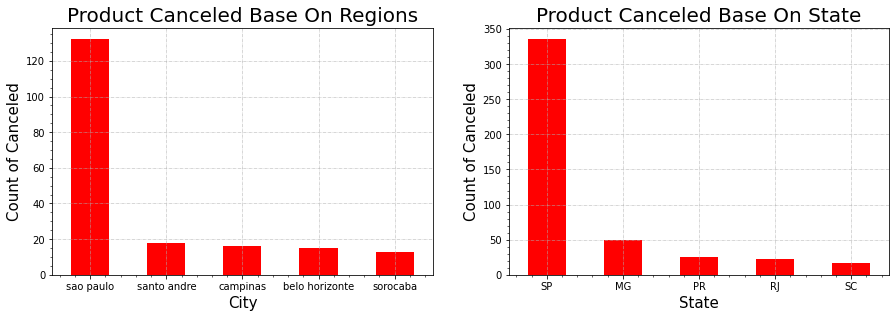

In [41]:
# Wilayah yang sering dicancel
city_cancel = data_analisa[data_analisa['order_status'] == 'canceled'] 
city_cancel_head = city_cancel.groupby(["seller_city"])["seller_city"].count().sort_values(ascending=False).head()
state_cancel_head = city_cancel.groupby(["seller_state"])["seller_state"].count().sort_values(ascending=False).head()

#Visualization
plt.subplot(2, 2, 1 )
city_cancel_head.plot(x="seller_city", y="seller_city", kind="bar", figsize=(15, 10), rot= 0, facecolor='r')
plt.title ("Product Canceled Base On Regions", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('City',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2 )
state_cancel_head.plot(x="seller_state", y="seller_state", kind="bar", figsize=(15, 10), rot= 0, facecolor='r')
plt.title ("Product Canceled Base On State", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('State',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

### Best time of purchase

Text(10, 11164, 'Purchase The Highest (Month 8)')

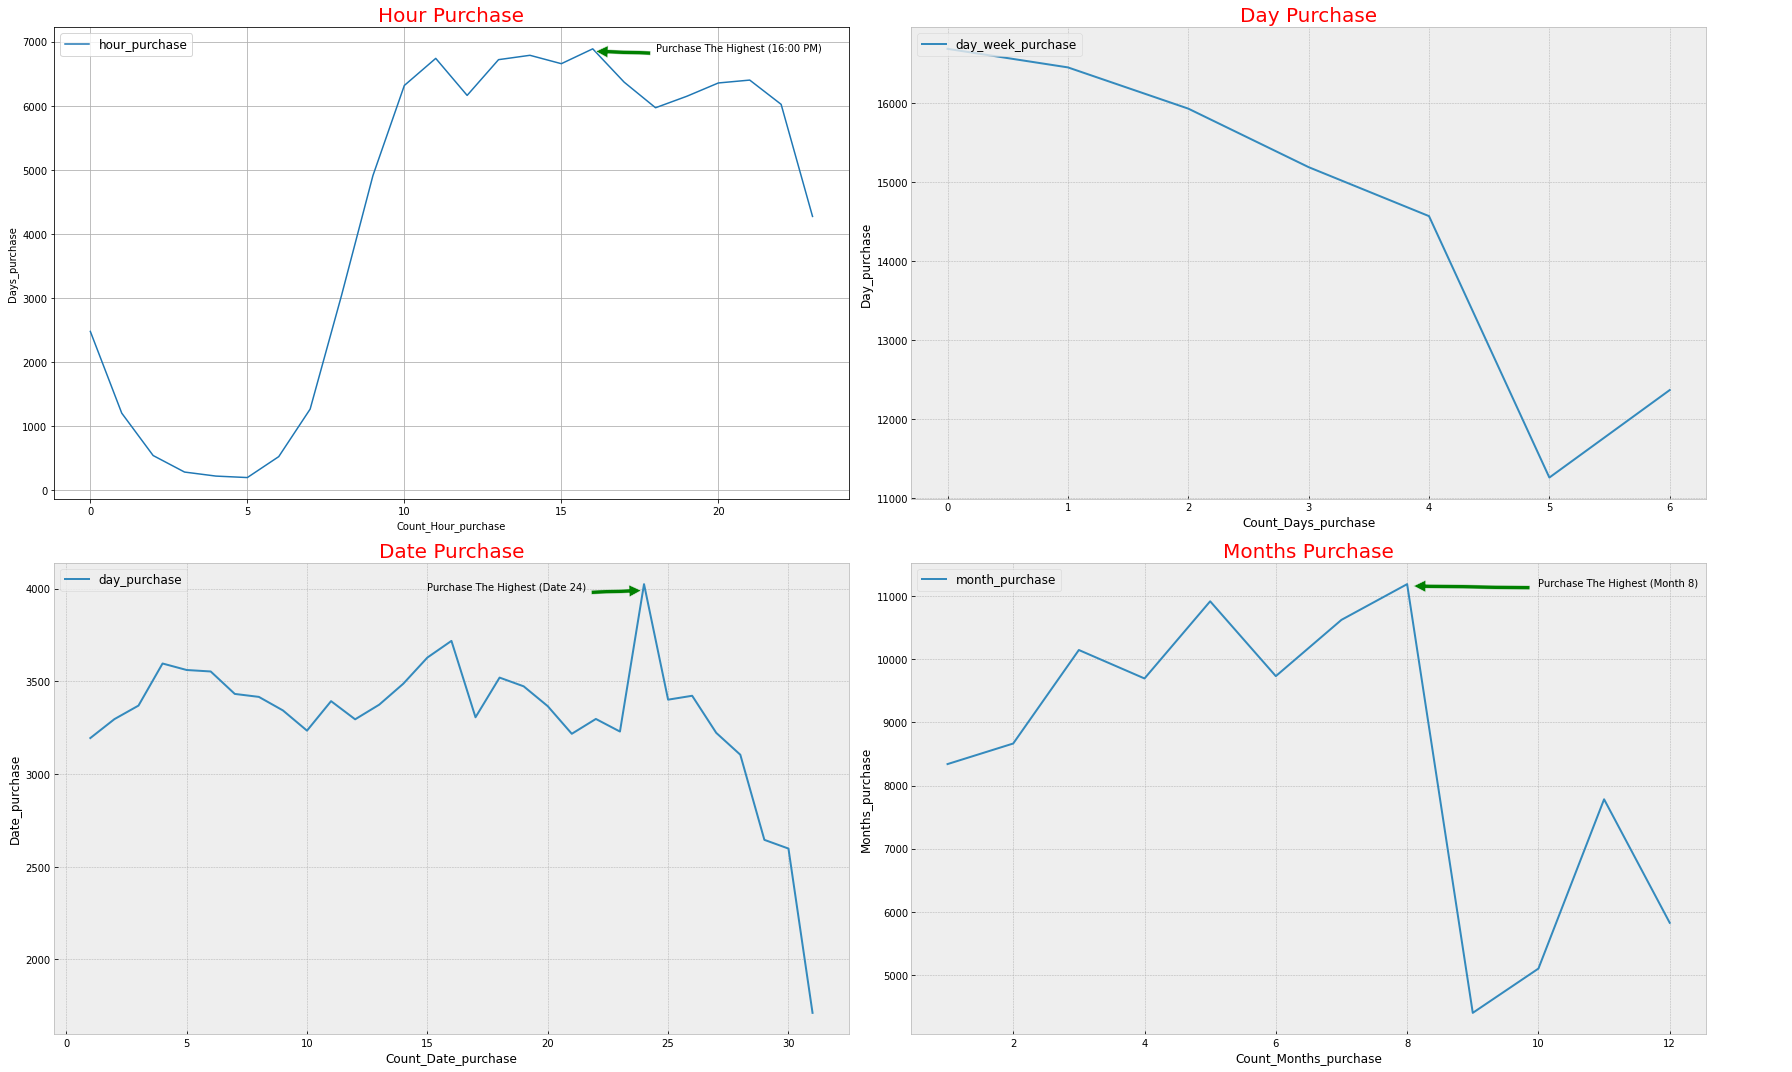

In [42]:
# Jam berapa yang paling sering terjadi pembelian 
hour_analisis = data_analisa.groupby(["hour_purchase"])["hour_purchase"].count()
day_analisis = data_analisa.groupby(["day_week_purchase"])["day_week_purchase"].count()
date_analisis = data_analisa.groupby(["day_purchase"])["day_purchase"].count()
months_analisis = data_analisa.groupby(["month_purchase"])["month_purchase"].count()

# Visualization
plt.subplot(2, 2, 1 )
ax = hour_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Hour_purchase")
ax.set_ylabel("Days_purchase")
plt.title('Hour Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (16:00 PM)', xy=(16, 6850),xytext=(18, 6850),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

plt.subplot(2, 2, 2 )
ax = day_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Days_purchase")
ax.set_ylabel("Day_purchase")
plt.title('Day Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (Days 7)', xy=(7, 16562),xytext=(5, 16562),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

plt.subplot(2, 2, 3 )
ax = date_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Date_purchase")
ax.set_ylabel("Date_purchase")
plt.title('Date Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (Date 24)', xy=(24, 3990),xytext=(15, 3990),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

plt.subplot(2, 2, 4 )
ax = months_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Months_purchase")
ax.set_ylabel("Months_purchase")
plt.title('Months Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (Month 8)', xy=(8, 11164),xytext=(10, 11164),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )